# **DEEPLEARNING MODEL USING MNIST DATASET:-**

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split

In [3]:
#load the data
(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images[13]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
        110,  60,  38,  94,  73,  27,   0,   0,   0,   0,   0,   0, 121,
         78,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  68,
         22,   1,  82, 140, 131, 178, 144,  92,  41,   0,  32,  99, 151,
        129,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   0,   0,  41, 126, 153,
        140, 125, 120, 112, 108, 117, 102, 121, 144, 123, 120,  34, 124,
        161,   0],
       [  0,   0,   0,   0,   1,   2,   3,   0,   0,  72, 184,  77,  91,
        129, 125, 142, 141, 151, 139, 119, 112, 146, 112,  27,  25, 152,
        178,  28],
       [  0,   0,   0,   0,   2,   0,   2,  39,   0, 197,  41,  52,  43,
          0,   0,   0,   0,  16,  87, 134, 168, 156,  77,  48,  71, 162,
        172,  56],
       [  0,   0,   1,   0,   0,  54,  71, 178, 113,  18,  50, 215,  45,
          0,   4,   0,   0,   0,   0,   0,  44, 150, 145, 150, 176, 182,
        165,  56],
       [  2,   1,   0,   0, 105, 136,  94, 115, 181,  49, 110, 141,   7,
          0,   3,   1,   0,   1,   0,   0, 153, 179, 182, 195, 209, 193,
        170,  30],
       [  0,   0,   0,   0,  77,  56,  60,  57,  71,  77,  60, 137,   0,
          0,   0,   0,   0,   0,   0,  71, 254, 182, 219, 200, 199, 178,
        167,   4],
       [  0,   0,   0,   0, 130, 147, 147, 170, 162, 131, 157, 192,   0,
          0,   4,  29,  43,  71,  82, 108,  82,  52,  35,  24,  19,  13,
         23,   0],
       [ 59, 140, 117, 101, 121, 140, 149, 161, 173, 171, 173, 163,  72,
         76,  72,  83,  81,  77,  71,  68,  66,  81,  94,  99, 104,  99,
        121,  22],
       [ 16,  87, 114, 120,  98,  96, 104, 118, 137, 144, 155, 157, 195,
        163, 173, 177, 177, 178, 179, 224, 209, 194, 193, 198, 198, 155,
        183,  27],
       [  0,   0,   0,   0,   3,  11,  22,  34,  36,  50,  43,  49,  48,
         64,  66,  40,  32,  36,  46,  62,  66,  61,  73,  70,  56,  46,
         18,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
#normalizing
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

In [ ]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
len(train_images) #length of training data

60000

In [ ]:
len(test_images) #length of testing data

10000

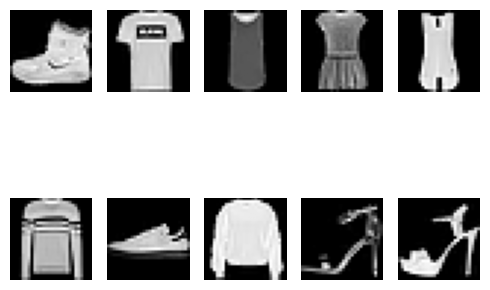

In [4]:
#image proc
plt.figure(figsize=(5,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  img = train_images[i].reshape(28,28) #good deve do not chances
  plt.imshow(img, cmap='gray')
  plt.axis('off')
plt.tight_layout()

In [ ]:
#channel mono channel - reshape
train_images = train_images.reshape((-1,28,28,1)) #60,000
                                    # (num of images, height, width, channel)
test_images = test_images.reshape((-1,28,28,1))

In [ ]:
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1, random_state=42)

In [ ]:
train_labels[2]

np.uint8(9)

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.Rescaling(1./255),                   # Normalize the input
    layers.RandomRotation(0.15),                # Rotate within ±15%
    layers.RandomZoom(0.1),                     # Zoom in/out by 10%
    layers.RandomTranslation(0.1, 0.1),         # Shift up to 10% in width/height
    layers.RandomContrast(0.1),                 # Vary contrast
])

In [ ]:
#CNN model framework:-
def create_model():
    model = models.Sequential([
        data_augmentation,

        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
model = create_model()

In [ ]:
#complile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

In [ ]:
# 9. Train the model
history = model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=30,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.5682 - loss: 1.2948 - val_accuracy: 0.6952 - val_loss: 0.7671 - learning_rate: 0.0010
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7347 - loss: 0.7165 - val_accuracy: 0.8105 - val_loss: 0.5092 - learning_rate: 0.0010
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7688 - loss: 0.6208 - val_accuracy: 0.8138 - val_loss: 0.4891 - learning_rate: 0.0010
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.7902 - loss: 0.5740 - val_accuracy: 0.8052 - val_loss: 0.5188 - learning_rate: 0.0010
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8025 - loss: 0.5386
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.8026 - loss: 0.5386 - val_accuracy: 0.7895 - val_loss: 0.5339 - learning_rate: 0.0010
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.8227 - los

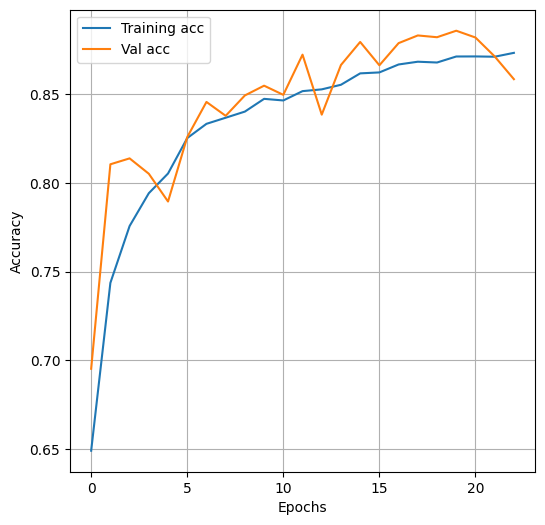

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(history.history['accuracy'], label='Training acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

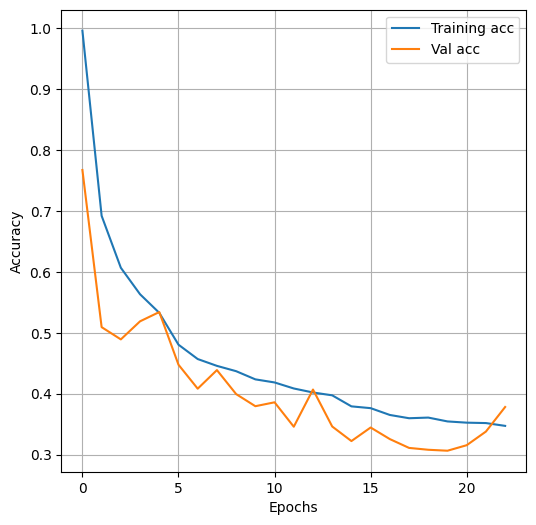

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(history.history['loss'], label='Training acc')
plt.plot(history.history['val_loss'], label='Val acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("\n✅ Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8869 - loss: 0.3207

✅ Test Accuracy: 0.8860999941825867


# **🧠 CNN Model:** External Image Loading & Prediction — Step-by-Step Guide
✅ Step 1: Save Your Trained CNN Model After training your model (on MNIST or similar), save it to a file so it can be used later for predictions.

✅ Step 2: Import Necessary Libraries Make sure you import libraries for:

TensorFlow or Keras (for model handling)

PIL (to load and process images)

NumPy (for numerical operations)

Matplotlib (to visualize predictions)

✅ Step 3: Define a Function to Preprocess and Predict the Image Create a function that:

Loads the external image

Converts it to grayscale (since MNIST uses grayscale)

Inverts the image (white digit on black background)

Resizes it to 28x28 pixels

Normalizes pixel values to 0–1

Reshapes it to match CNN input format (1, 28, 28, 1)

Predicts using the loaded model

Returns the predicted digit and confidence

✅ Step 4: Define a Function to Load the Model and Use the Above Prediction Function Create a wrapper function that:

Loads the saved model from file

Calls the prediction function

Displays the predicted digit and confidence

Also shows the image with title using matplotlib

✅ Step 5: Upload or Use an Image Use an external image file (JPG/PNG) of an object.

If you're using Google Colab, use files.upload() to bring the image in

✅ Step 6: Call the Load-and-Predict Function Give your image path to the function and run it

You’ll see:

The predicted digit

The confidence score

The image displayed with prediction details

✅ Step 7: Practice with Different Images Test the model with multiple images

In [ ]:
model.save('mnist_cnn_model.keras')

In [ ]:
from PIL import Image, ImageOps

In [ ]:
def predict_image(image_path, model):
  img = Image.open(image_path).convert('L')
  img = ImageOps.invert(img) #inverting
  img = img.resize((28,28))
  img_array = np.array(img)
  img_array = img_array.astype("float32") / 255
  img_array = img_array.reshape((1,28,28,1))

  prediction = model.predict(img_array)
  print(prediction)
  predicted_class = np.argmax(prediction)
  print(predicted_class)
  confidence = np.max(prediction)
  print(confidence)
  return predicted_class, confidence

In [ ]:
def load_and_predict(image_path):
  loaded_model = tf.keras.models.load_model('mnist_cnn_model.keras')
  predicted_class, confidence = predict_image(image_path, loaded_model)
  print(f"Predicted Digit : {predicted_class}")
  print(f"Confidence : {confidence}")

  img = Image.open(image_path).convert("L")
  plt.imshow(img,cmap='gray')
  plt.title(f"Predicted : {predicted_class} (Confidence : {confidence})")
  plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
[[1.0248888e-01 4.9413475e-03 6.6332549e-01 3.3305120e-02 1.1506051e-02
  9.4897980e-05 2.1403732e-02 9.8529845e-06 1.6286482e-01 5.9833488e-05]]
2
0.6633255
Predicted Digit : 2
Confidence : 0.6633254885673523


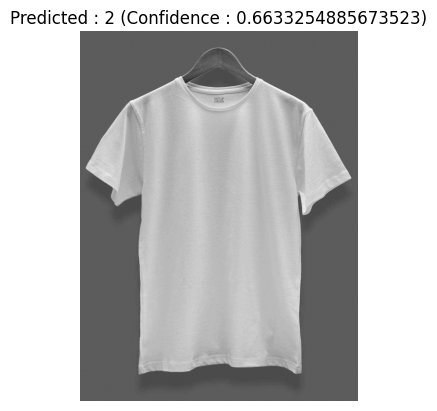

In [ ]:
load_and_predict("/content/tshirt.jpg")

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

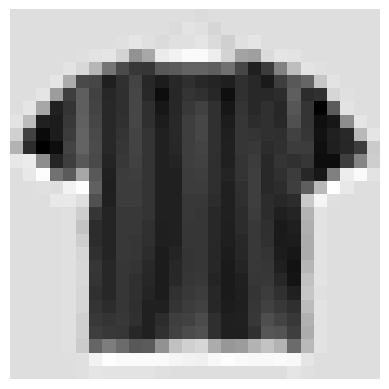

In [ ]:
# Testing data visualization:-
img = Image.open('/content/tshirt.jpg').convert("L")
img=img.resize((28,28))
img=ImageOps.invert(img)
plt.imshow(img,cmap='gray')
plt.axis('off')